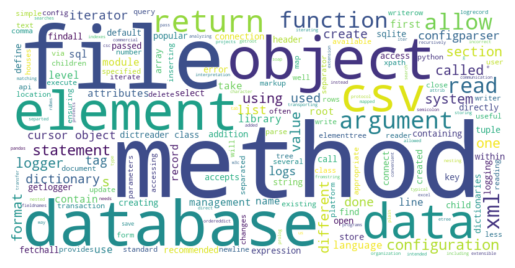

In [1]:
import sqlite3
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

conn = sqlite3.connect("/Users/dustincremascoli/Documents/prof_cert/testprep/study.sqlite")
cur = conn.cursor()
cur.execute("""
            SELECT  N.id, N.topic, N.sub_topic, N.study_point, T.module
            FROM NOTES N LEFT JOIN TOPICS T
            ON N.topic = T.topic AND N.sub_topic = T.sub_topic;
            """)
notes_list = cur.fetchall()
conn.close()

text = " ".join(list(map(lambda x: x[3].replace("\n", "").lower(),
                         filter(lambda x: x[4]=="module_5",notes_list))))

wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=800, height=400,
                      background_color="white",
                      collocations=True).generate(text)

wordcloud.to_file("wc.pdf")

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
